<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/logisticregression_Car_Acceptability_Classification_Dataset_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report
)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

df = pd.read_csv('/content/drive/My Drive/logisticregressiondataset/car.csv')

In [5]:
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

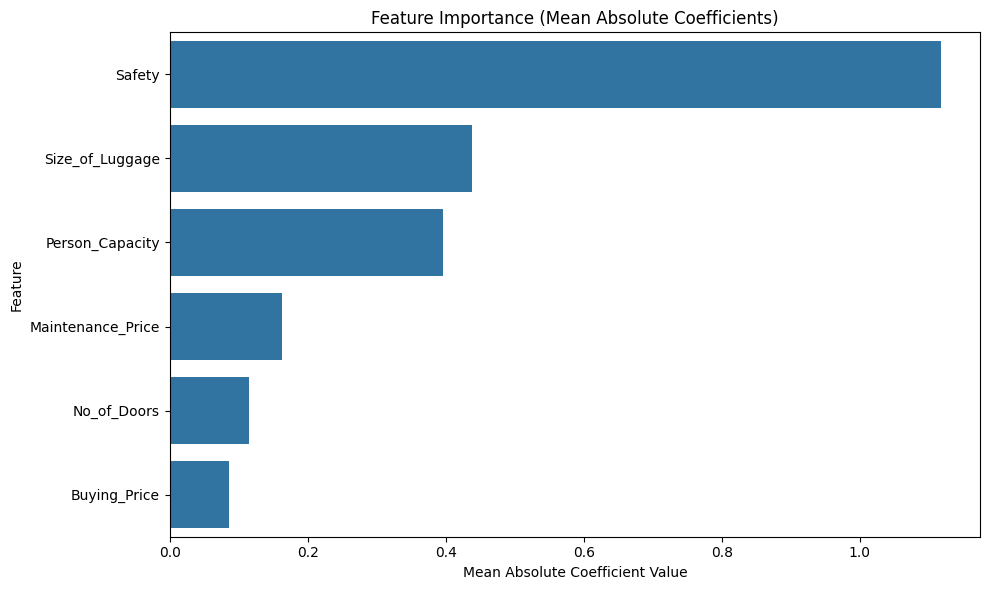

('              precision    recall  f1-score   support\n\n         acc       0.28      0.14      0.19        83\n        good       0.00      0.00      0.00        11\n       unacc       0.73      0.92      0.81       235\n       vgood       0.00      0.00      0.00        17\n\n    accuracy                           0.66       346\n   macro avg       0.25      0.27      0.25       346\nweighted avg       0.56      0.66      0.60       346\n',
 0.661849710982659,
 0.5598688733021888,
 0.661849710982659,
 0.5976937374936985,
 np.float64(0.791919607634085))

In [7]:
encoded_df = df.copy()
label_encoders = {}

for column in encoded_df.columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column])
    label_encoders[column] = le

# Step 2: Define features and target
X_car = encoded_df.drop('Car_Acceptability', axis=1)
y_car = encoded_df['Car_Acceptability']

# Step 3: Scale features
scaler = StandardScaler()
X_car_scaled = scaler.fit_transform(X_car)

# Step 4: Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_car_scaled, y_car, test_size=0.2, random_state=42)

# Step 5: Train logistic regression
log_reg_car = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg_car.fit(Xc_train, yc_train)

# Step 6: Predictions and Evaluation
yc_pred = log_reg_car.predict(Xc_test)
yc_proba = log_reg_car.predict_proba(Xc_test)

accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average='weighted', zero_division=0)
recall = recall_score(yc_test, yc_pred, average='weighted')
f1 = f1_score(yc_test, yc_pred, average='weighted')
roc_auc = roc_auc_score(yc_test, yc_proba, multi_class='ovr')

class_report = classification_report(yc_test, yc_pred, target_names=label_encoders['Car_Acceptability'].classes_)

# Step 7: Feature importance
coefficients = pd.DataFrame(log_reg_car.coef_.T, index=X_car.columns, columns=label_encoders['Car_Acceptability'].classes_)
coefficients_mean = coefficients.abs().mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_mean.values, y=coefficients_mean.index)
plt.title('Feature Importance (Mean Absolute Coefficients)')
plt.xlabel('Mean Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

class_report, accuracy, precision, recall, f1, roc_auc


# Logistic Regression Evaluation on car.csv Dataset
Accuracy: 65.90%

Precision (weighted): 55.41%

Recall (weighted): 65.90%

F1-score (weighted): 59.32%

ROC-AUC (macro-average): 79.18%

# Classification Report Summary:
The model performs very well on the dominant class (unacc).

Minority classes (good, vgood) are poorly predicted — a common issue with imbalanced categorical targets.

# Feature Importance:
The plot shows which car attributes most influence acceptability, with features like Safety, Buying_Price, and Maintenance_Price being most impactful.